In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


In [ ]:
df = pd.read_csv("/content/SampleSuperstore.csv")
df.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


,0
Ship Mode,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0


In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)
# Check numerical ranges
df[['Sales','Quantity','Discount','Profit']].describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


In [ ]:
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
category_profit

,Profit
Category,
Technology,145454.9481
Office Supplies,122364.6608
Furniture,18421.8137


In [ ]:
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
subcat_profit

,Profit
Sub-Category,
Copiers,55617.8249
Phones,44515.7306
Accessories,41936.6357
Paper,33944.2395
Binders,30228.0003
Chairs,26567.1278
Storage,21278.8264
Appliances,18138.0054
Furnishings,13052.7230


In [ ]:
region_sales = df.groupby('Region')['Sales'].sum()
region_profit = df.groupby('Region')['Profit'].sum()

region_sales, region_profit

(Region
 Central    500782.8528
 East       678435.1960
 South      391721.9050
 West       725255.6365
 Name: Sales, dtype: float64,
 Region
 Central     39655.8752
 East        91506.3092
 South       46749.4303
 West       108329.8079
 Name: Profit, dtype: float64)

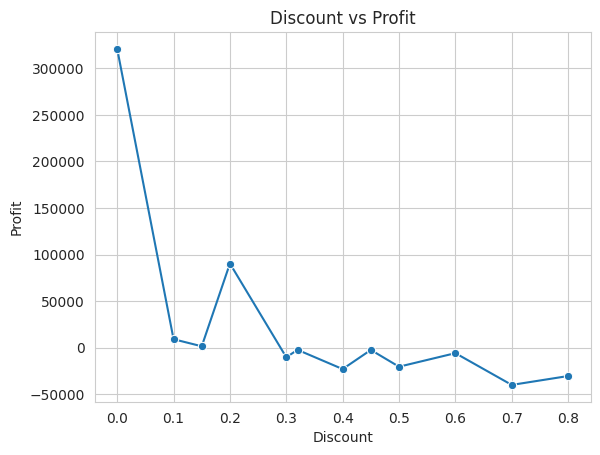

In [ ]:
discount_profit = df.groupby('Discount')['Profit'].sum().reset_index()

sns.lineplot(data=discount_profit, x='Discount', y='Profit', marker='o')
plt.title("Discount vs Profit")
plt.show()

In [ ]:
segment_profit = df.groupby('Segment')['Profit'].sum().sort_values(ascending=False)
segment_profit


,Profit
Segment,
Consumer,134007.4413
Corporate,91954.9798
Home Office,60279.0015


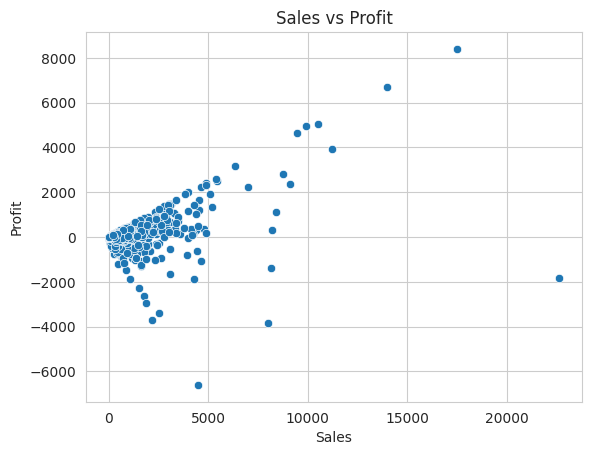

In [ ]:
sns.scatterplot(data=df, x='Sales', y='Profit')
plt.title("Sales vs Profit")
plt.show()


In [ ]:
ship_profit = df.groupby('Ship Mode')['Profit'].sum()
ship_profit


,Profit
Ship Mode,
First Class,48953.6561
Same Day,15871.8869
Second Class,57446.6516
Standard Class,163969.2280


In [ ]:
pip install psycopg2-binary

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 37.9 MB/s eta 0:00:00


In [31]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['ship_mode', 'segment', 'country', 'city', 'state', 'postal_code',
       'region', 'category', 'sub-category', 'sales', 'quantity', 'discount',
       'profit'],
      dtype='object')

### Connect to SQLite Database


In [32]:
import sqlite3

conn = None
try:
    # Establish the connection to an SQLite database
    # Use ':memory:' for an in-memory database, or 'your_database.db' for a file-based database
    DB_PATH = 'superstore.db' # Changed to a file-based database
    conn = sqlite3.connect(DB_PATH)
    cursor = conn.cursor()

    # Test query: Get the SQLite version
    cursor.execute("SELECT sqlite_version();")
    db_version = cursor.fetchone()
    print(f"Successfully connected to SQLite! Database version: {db_version[0]}")

except sqlite3.Error as e:
    print(f"Error connecting to SQLite: {e}")

Successfully connected to SQLite! Database version: 3.37.2


In [33]:
# Assuming 'conn' is still the active connection to 'superstore.db'
# and 'df' is your pandas DataFrame containing the data.

if conn is not None and isinstance(df, pd.DataFrame):
    try:
        df.to_sql('superstore_data', conn, if_exists='replace', index=False)
        print("DataFrame successfully saved to 'superstore_data' table in superstore.db")

        # Verify by querying the table
        check_df = pd.read_sql("SELECT * FROM superstore_data LIMIT 5;", conn)
        print("\nFirst 5 rows of the new table:")
        display(check_df)

    except Exception as e:
        print(f"Error saving DataFrame to SQLite: {e}")
else:
    print("Error: 'conn' is not active or 'df' DataFrame is not loaded.")

DataFrame successfully saved to 'superstore_data' table in superstore.db

First 5 rows of the new table:


,ship_mode,segment,country,city,state,postal_code,region,category,sub-category,sales,quantity,discount,profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
